## Homework:
### Burger's equation

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1)Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2)Please experiment with different grid sizes.

3)Now the solution develops a non-symmetric profile over time.  Can you explain why?

t =  1.0090090090090067
t =  2.0068068068068095
t =  3.0046046046045927
t =  4.002402402402376
t =  5.000200200200199
t =  6.009209209209233
t =  7.007007007007056
t =  8.004804804804879
t =  9.002602602602702
t =  10.000400400400524
t =  11.009409409409558
t =  12.007207207207381
t =  13.005005005005204
t =  14.002802802803027
t =  15.00060060060085
t =  16.009609609609882
t =  17.007407407407705
t =  18.005205205205527
t =  19.00300300300335
t =  20.000800800801173
Done.


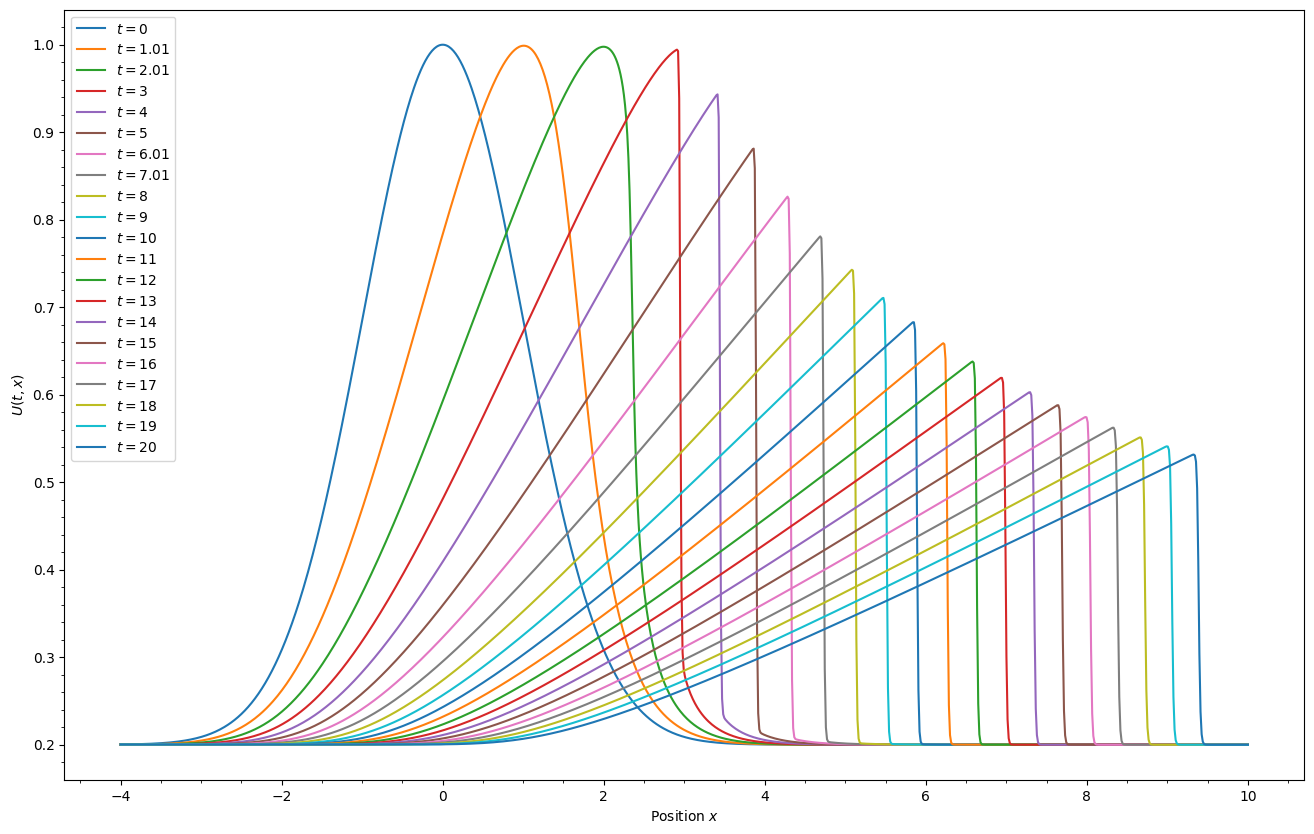

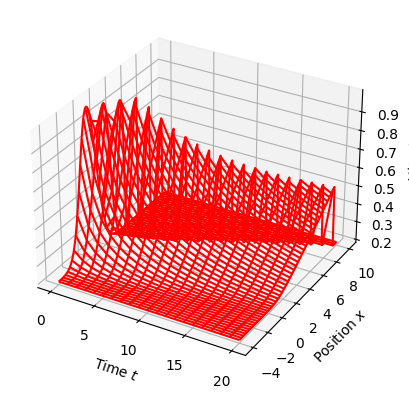

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -4.0   # left boundary
xmax = +10.0   # right boundary
Nx = 1000    # number of grid points (including boundary)
tend = 20.0    # end time
dtout = 1.  # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)

    # Find the state at the next time step.
    if Uold[ix] > 0:
        for ix in range(1, Nx - 1):
           U[ix]=Uold[ix]-Uold[ix]*dt*(Uold[ix]-Uold[ix-1])/dx # Task: implement upwind method here.
            
    else:
        for ix in range(1, Nx - 1):
           U[ix]=Uold[ix]-Uold[ix]*dt*(Uold[ix+1]-Uold[ix])/dx # Task: implement upwind method here.
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig=plt.figure()
ax3D = fig.add_subplot(projection='3d')
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()